# Image Segmentation
An image is a collection or set of different pixels. We group together the pixels that have similar attributes using image segmentation.. Thus, the task of image segmentation is to train a neural network to output a pixel-wise mask of the image. This helps in understanding the image at a much lower level, i.e., the pixel level.In image segmetation each pixel is given a label.

Before diving into code, first we will need to import all the required libraries

# Import libraries

In [2]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from zipfile import ZipFile 
import keras.backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

# Dataset Preparation

Let's unzip all the files

In [3]:
train_zip = "/kaggle/input/carvana-image-masking-challenge/train.zip"
with ZipFile(train_zip, 'r') as zip_: 
    zip_.extractall('/kaggle/working')

In [4]:
train_mask_zip = "/kaggle/input/carvana-image-masking-challenge/train_masks.zip"
with ZipFile(train_mask_zip, 'r') as zip_: 
    zip_.extractall('/kaggle/working')

In [5]:
print("Train set:  ", len(os.listdir("/kaggle/working/train")))
print("Train masks:", len(os.listdir("/kaggle/working/train_masks")))

Train set:   5088
Train masks: 5088


In [6]:
car_ids = []
paths = []
for dirname, _, filenames in os.walk('/kaggle/working/train'):
    for filename in filenames:
        path = os.path.join(dirname, filename)    
        paths.append(path)
        
        car_id = filename.split(".")[0]
        car_ids.append(car_id)

d = {"id": car_ids, "car_path": paths}
df = pd.DataFrame(data = d)
df = df.set_index('id')
df

,car_path
id,
c3dafdb02e7f_05,/kaggle/working/train/c3dafdb02e7f_05.jpg
6752de44b721_14,/kaggle/working/train/6752de44b721_14.jpg
528eb34a4c29_13,/kaggle/working/train/528eb34a4c29_13.jpg
69915dab0755_14,/kaggle/working/train/69915dab0755_14.jpg
f4cd1286d5f4_08,/kaggle/working/train/f4cd1286d5f4_08.jpg
...,...
c4f1840b2a65_02,/kaggle/working/train/c4f1840b2a65_02.jpg
f3eee6348205_11,/kaggle/working/train/f3eee6348205_11.jpg
1258cf954183_03,/kaggle/working/train/1258cf954183_03.jpg


In [7]:
car_ids = []
mask_path = []
for dirname, _, filenames in os.walk('/kaggle/working/train_masks'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        mask_path.append(path)
        
        car_id = filename.split(".")[0]
        car_id = car_id.split("_mask")[0]
        car_ids.append(car_id)

        
d = {"id": car_ids,"mask_path": mask_path}
mask_df = pd.DataFrame(data = d)
mask_df = mask_df.set_index('id')
mask_df

,mask_path
id,
c9acf5847ef1_07,/kaggle/working/train_masks/c9acf5847ef1_07_ma...
c7145a80089e_14,/kaggle/working/train_masks/c7145a80089e_14_ma...
78bfb9c780db_06,/kaggle/working/train_masks/78bfb9c780db_06_ma...
1aba91a601c6_06,/kaggle/working/train_masks/1aba91a601c6_06_ma...
784ca55262c2_10,/kaggle/working/train_masks/784ca55262c2_10_ma...
...,...
3bca821c8c41_07,/kaggle/working/train_masks/3bca821c8c41_07_ma...
e2230d0ceb02_05,/kaggle/working/train_masks/e2230d0ceb02_05_ma...
90b65c521a8b_08,/kaggle/working/train_masks/90b65c521a8b_08_ma...


In [8]:
df["mask_path"] = mask_df["mask_path"]
df

,car_path,mask_path
id,,
c3dafdb02e7f_05,/kaggle/working/train/c3dafdb02e7f_05.jpg,/kaggle/working/train_masks/c3dafdb02e7f_05_ma...
6752de44b721_14,/kaggle/working/train/6752de44b721_14.jpg,/kaggle/working/train_masks/6752de44b721_14_ma...
528eb34a4c29_13,/kaggle/working/train/528eb34a4c29_13.jpg,/kaggle/working/train_masks/528eb34a4c29_13_ma...
69915dab0755_14,/kaggle/working/train/69915dab0755_14.jpg,/kaggle/working/train_masks/69915dab0755_14_ma...
f4cd1286d5f4_08,/kaggle/working/train/f4cd1286d5f4_08.jpg,/kaggle/working/train_masks/f4cd1286d5f4_08_ma...
...,...,...
c4f1840b2a65_02,/kaggle/working/train/c4f1840b2a65_02.jpg,/kaggle/working/train_masks/c4f1840b2a65_02_ma...
f3eee6348205_11,/kaggle/working/train/f3eee6348205_11.jpg,/kaggle/working/train_masks/f3eee6348205_11_ma...
1258cf954183_03,/kaggle/working/train/1258cf954183_03.jpg,/kaggle/working/train_masks/1258cf954183_03_ma...


Now we will perform a simple augmentation of flipping an image and then normalize the image pixel in between 0 and 1

In [9]:
img_size = [256,256]

def data_augmentation(car_img, mask_img):

    if tf.random.uniform(()) > 0.5:
        car_img = tf.image.flip_left_right(car_img)
        mask_img = tf.image.flip_left_right(mask_img)

    return car_img, mask_img

def preprocessing(car_path, mask_path):
    car_img = tf.io.read_file(car_path) 
    car_img = tf.image.decode_jpeg(car_img, channels=3)
    car_img = tf.image.resize(car_img, img_size)
    car_img = tf.cast(car_img, tf.float32) / 255.0
    
    mask_img = tf.io.read_file(mask_path)
    mask_img = tf.image.decode_jpeg(mask_img, channels=3)
    mask_img = tf.image.resize(mask_img, img_size)
    mask_img = mask_img[:,:,:1]    
    mask_img = tf.math.sign(mask_img)
    
    
    return car_img, mask_img

def create_dataset(df, train = False):
    if not train:
        ds = tf.data.Dataset.from_tensor_slices((df["car_path"].values, df["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
    else:
        ds = tf.data.Dataset.from_tensor_slices((df["car_path"].values, df["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
        ds = ds.map(data_augmentation, tf.data.AUTOTUNE)

    return ds

Now we will split the dataset into train and test

In [10]:
train_df, valid_df = train_test_split(df, random_state=42, test_size=.25)
train = create_dataset(train_df, train = True)
valid = create_dataset(valid_df)

In [11]:
TRAIN_LENGTH = len(train_df)
BATCH_SIZE = 16
BUFFER_SIZE = 1000

In [12]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
valid_dataset = valid.batch(BATCH_SIZE)

Let's look the image and it's corresponding mask

In [13]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i])) 
        plt.axis('off')
    plt.show()

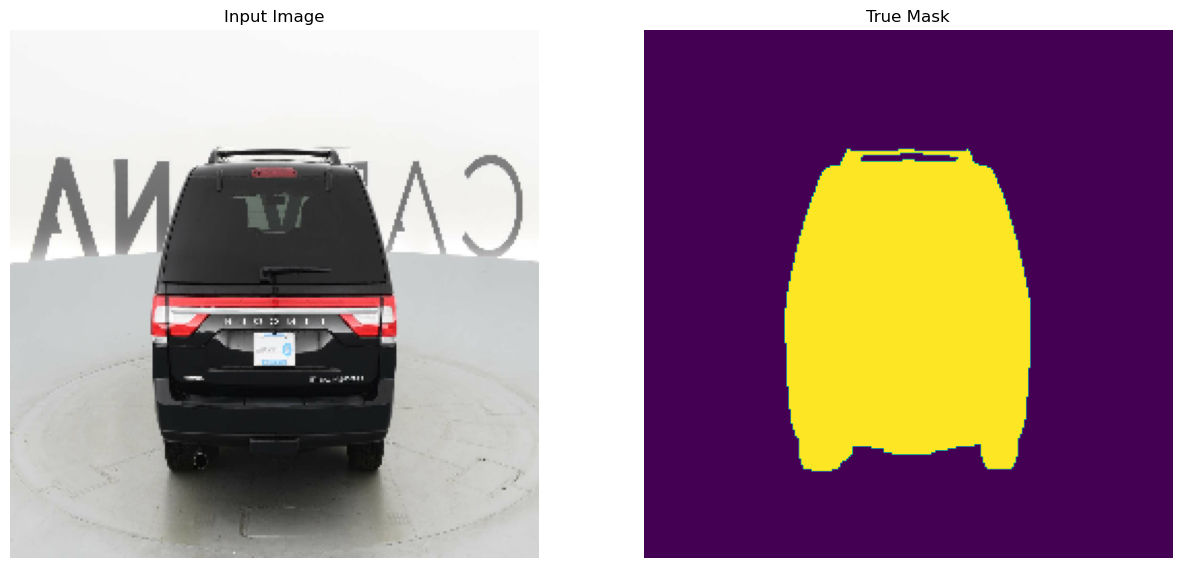

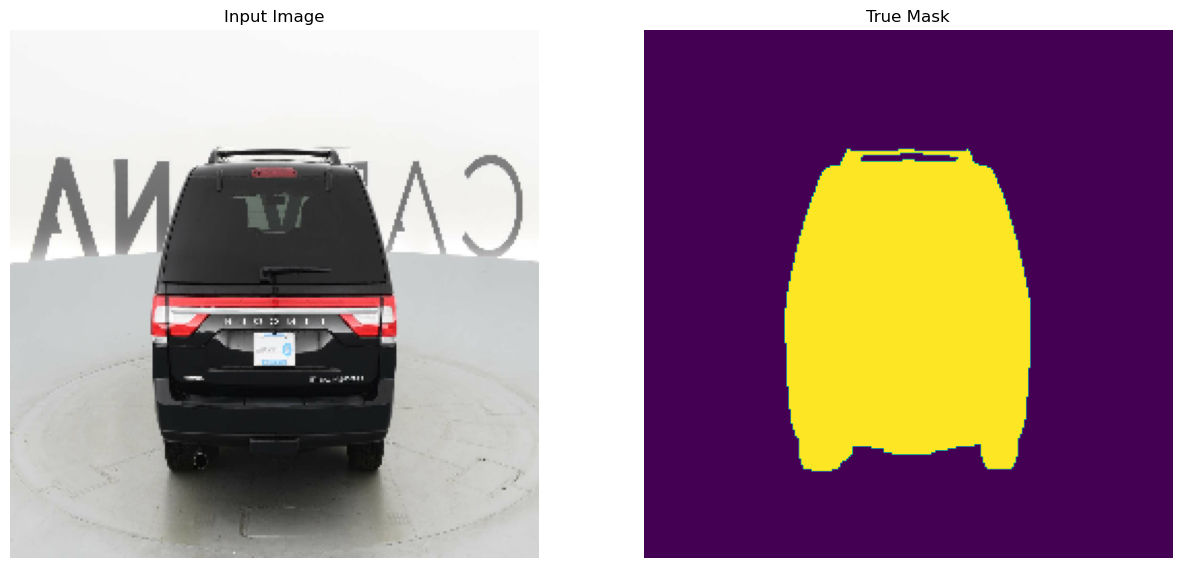

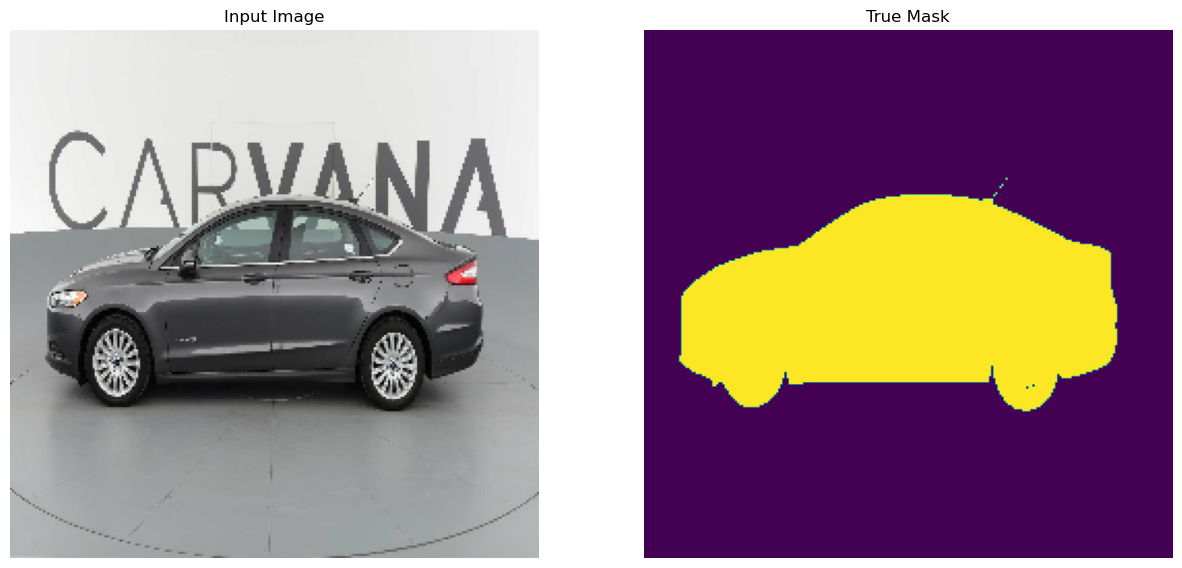

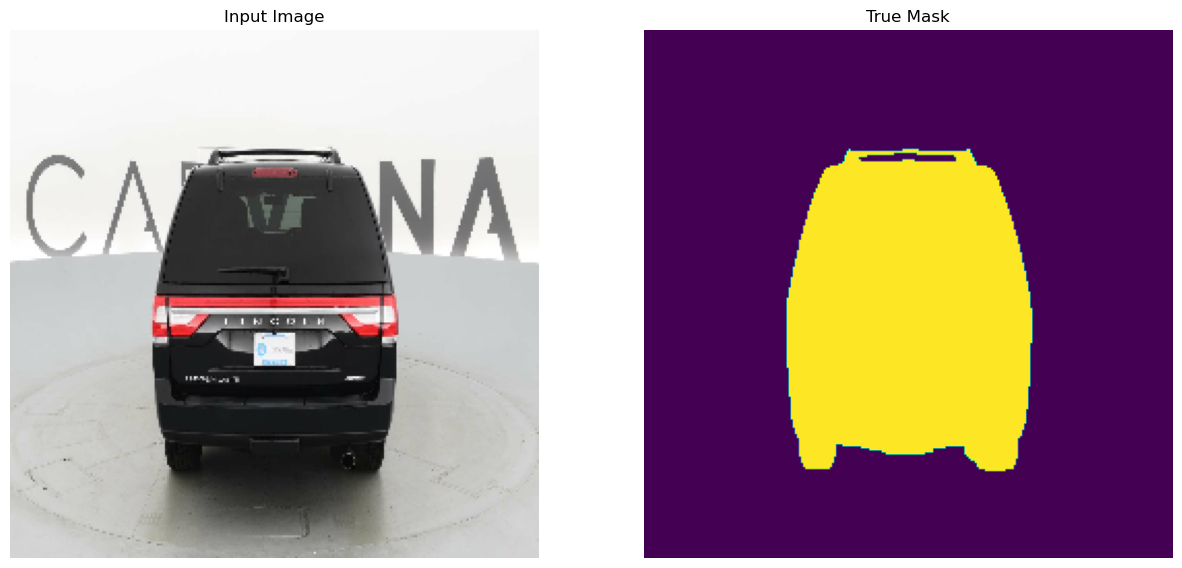

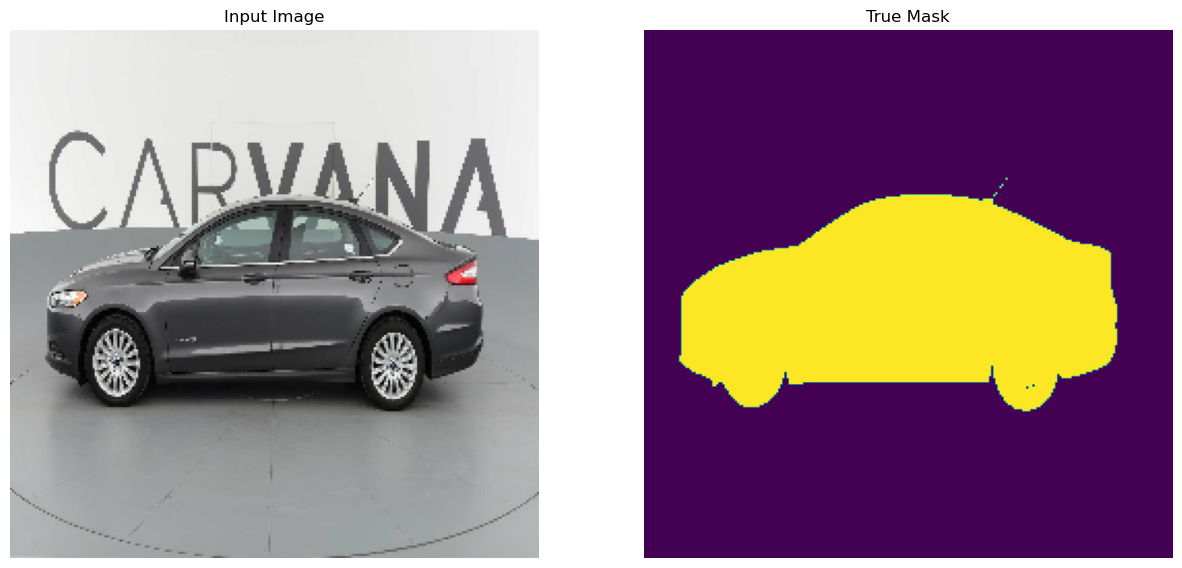

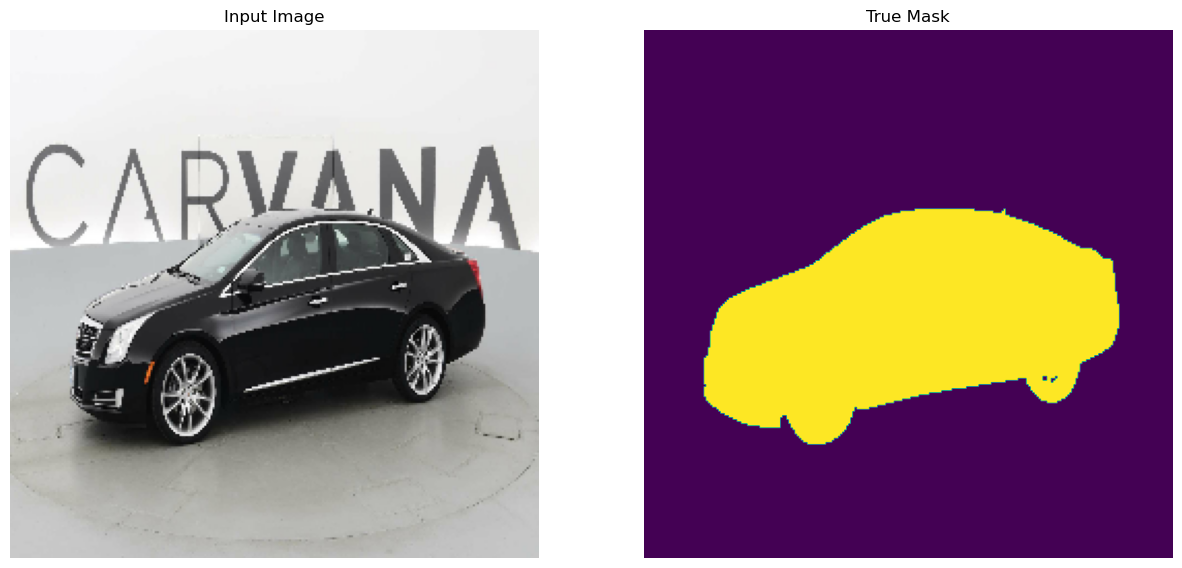

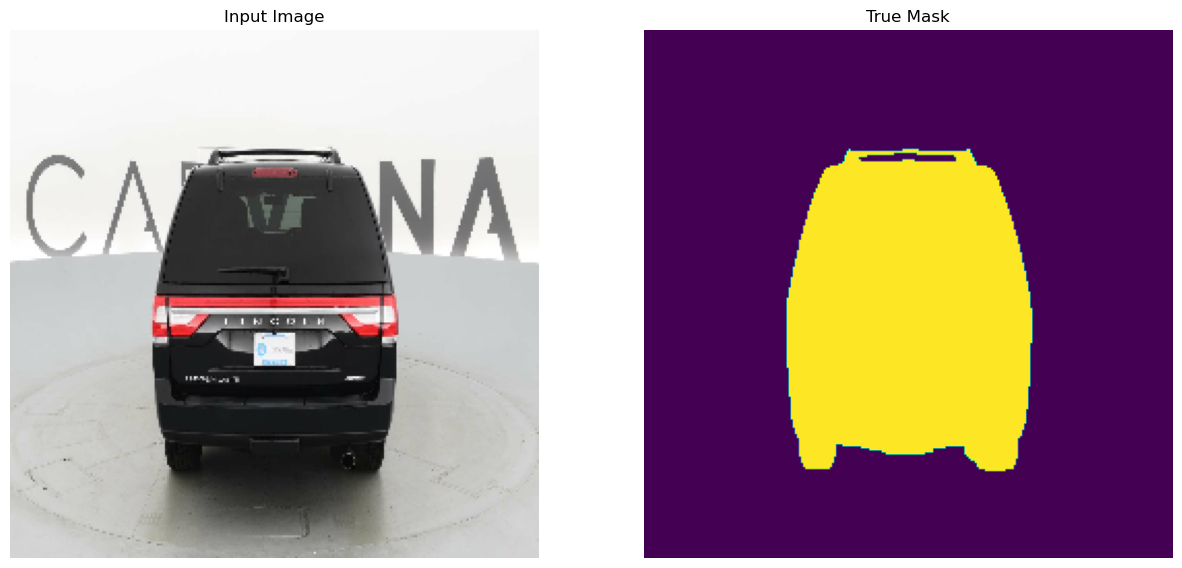

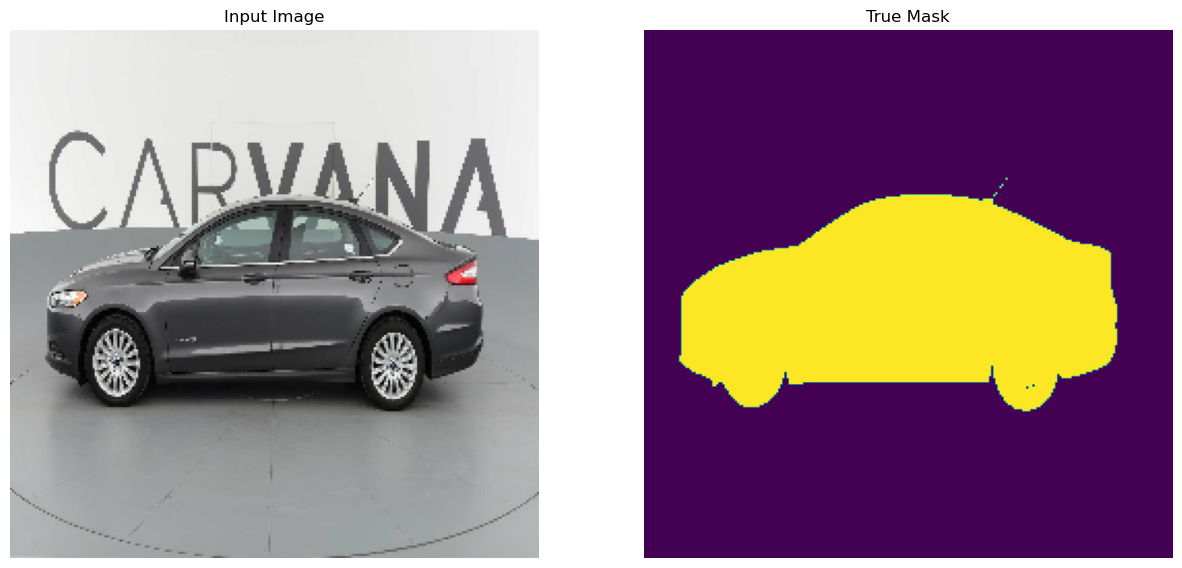

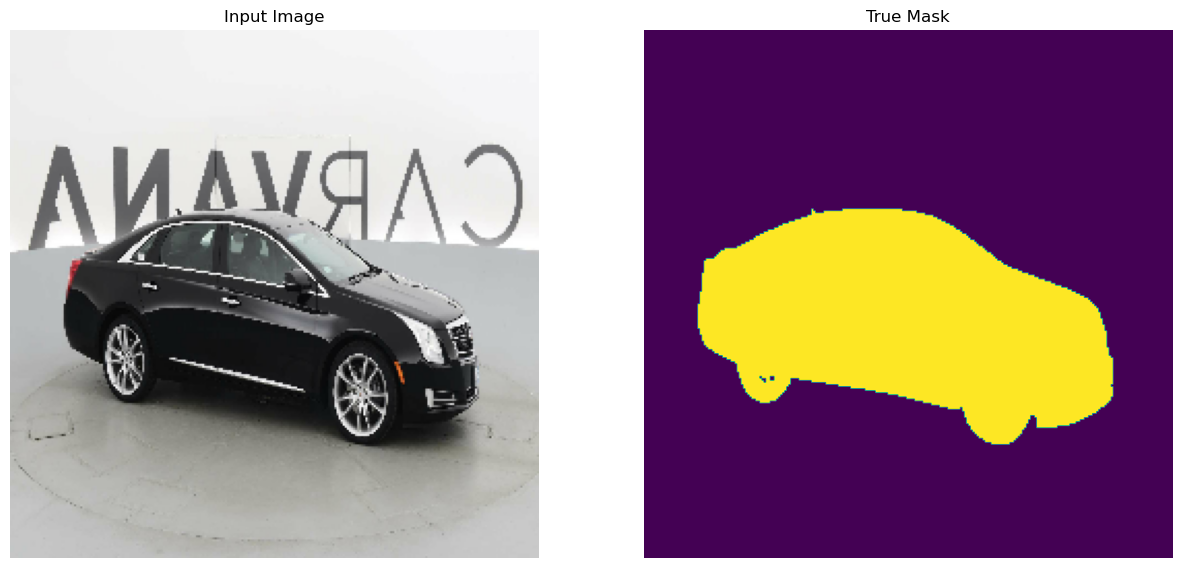

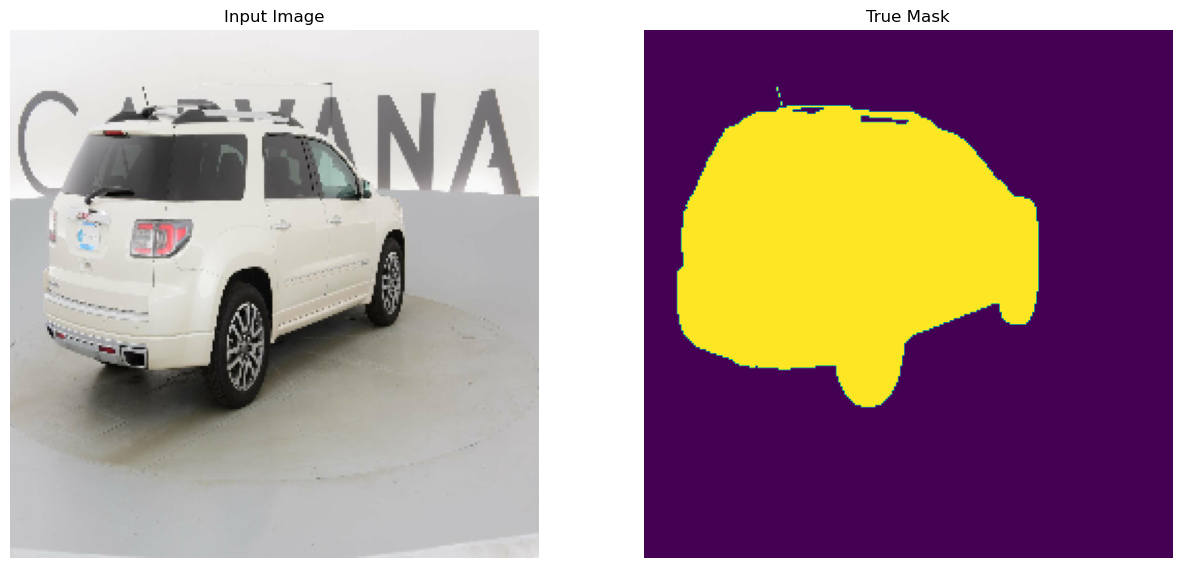

In [14]:
for i in range(5):
   for image, mask in train.take(i):
        sample_image, sample_mask = image, mask
        display([sample_image, sample_mask])

# Model

We are going to use U-Net model. A U-Net consists of an encoder (downsampler) and decoder (upsampler). In-order to learn robust features, and reduce the number of trainable parameters, a pretrained model can be used as the encoder.The encoder will be a pretrained MobileNetV2 model which is prepared and ready to use in tf.keras.applications. 

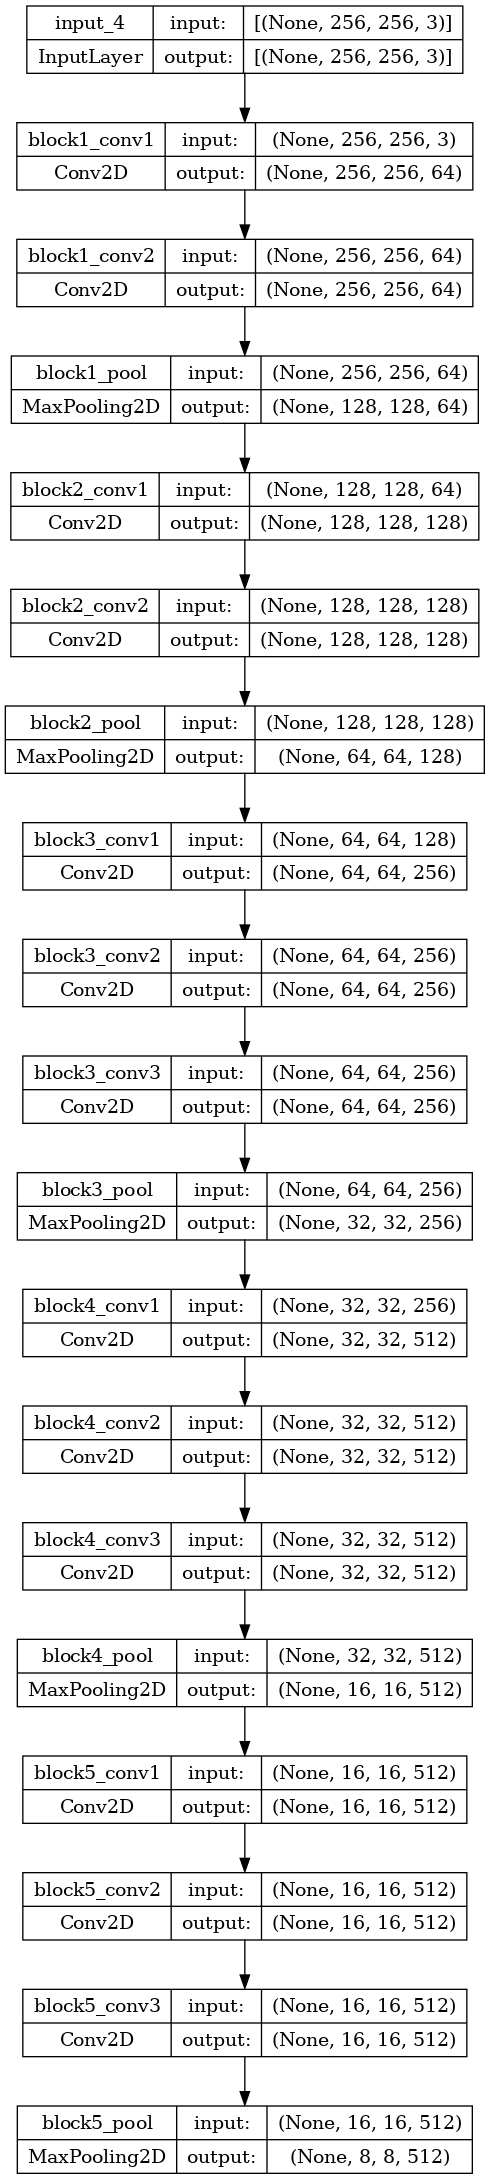

In [20]:
base_model = tf.keras.applications.VGG16(input_shape=[256, 256, 3], include_top=False)

tf.keras.utils.plot_model(base_model, show_shapes=True)

In [25]:

# Use the activations of these layers
layer_names = [
    'block2_conv1',   # 64x64
    'block3_conv1',   # 32x32
    'block4_conv1',   # 16x16
    'block5_conv1',  # 8x8
    'block5_pool',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)
down_stack.trainable = False

In [26]:
def upsample(filters, size, norm_type='batchnorm', apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    
    result = tf.keras.Sequential()
    result.add(
      tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                      padding='same',
                                      kernel_initializer=initializer,
                                      use_bias=False))

    if norm_type.lower() == 'batchnorm':
        result.add(tf.keras.layers.BatchNormalization())
    elif norm_type.lower() == 'instancenorm':
        result.add(InstanceNormalization())

    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))

        result.add(tf.keras.layers.ReLU())

    return result

up_stack = [
    upsample(512, 3),  # 4x4 -> 8x8
    upsample(256, 3),  # 8x8 -> 16x16
    upsample(128, 3),  # 16x16 -> 32x32
    upsample(64, 3),   # 32x32 -> 64x64
]

In [27]:
def unet_model(output_channels):
    inputs = tf.keras.layers.Input(shape=[256, 256, 3])

    # Downsampling through the model
    skips = down_stack(inputs)
    x = skips[-1]
    skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

  # This is the last layer of the model
    last = tf.keras.layers.Conv2DTranspose(
      output_channels, 3, strides=2, activation='sigmoid',
      padding='same')  #64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

# Train the Model

Now let's compile the model and see the model architecture

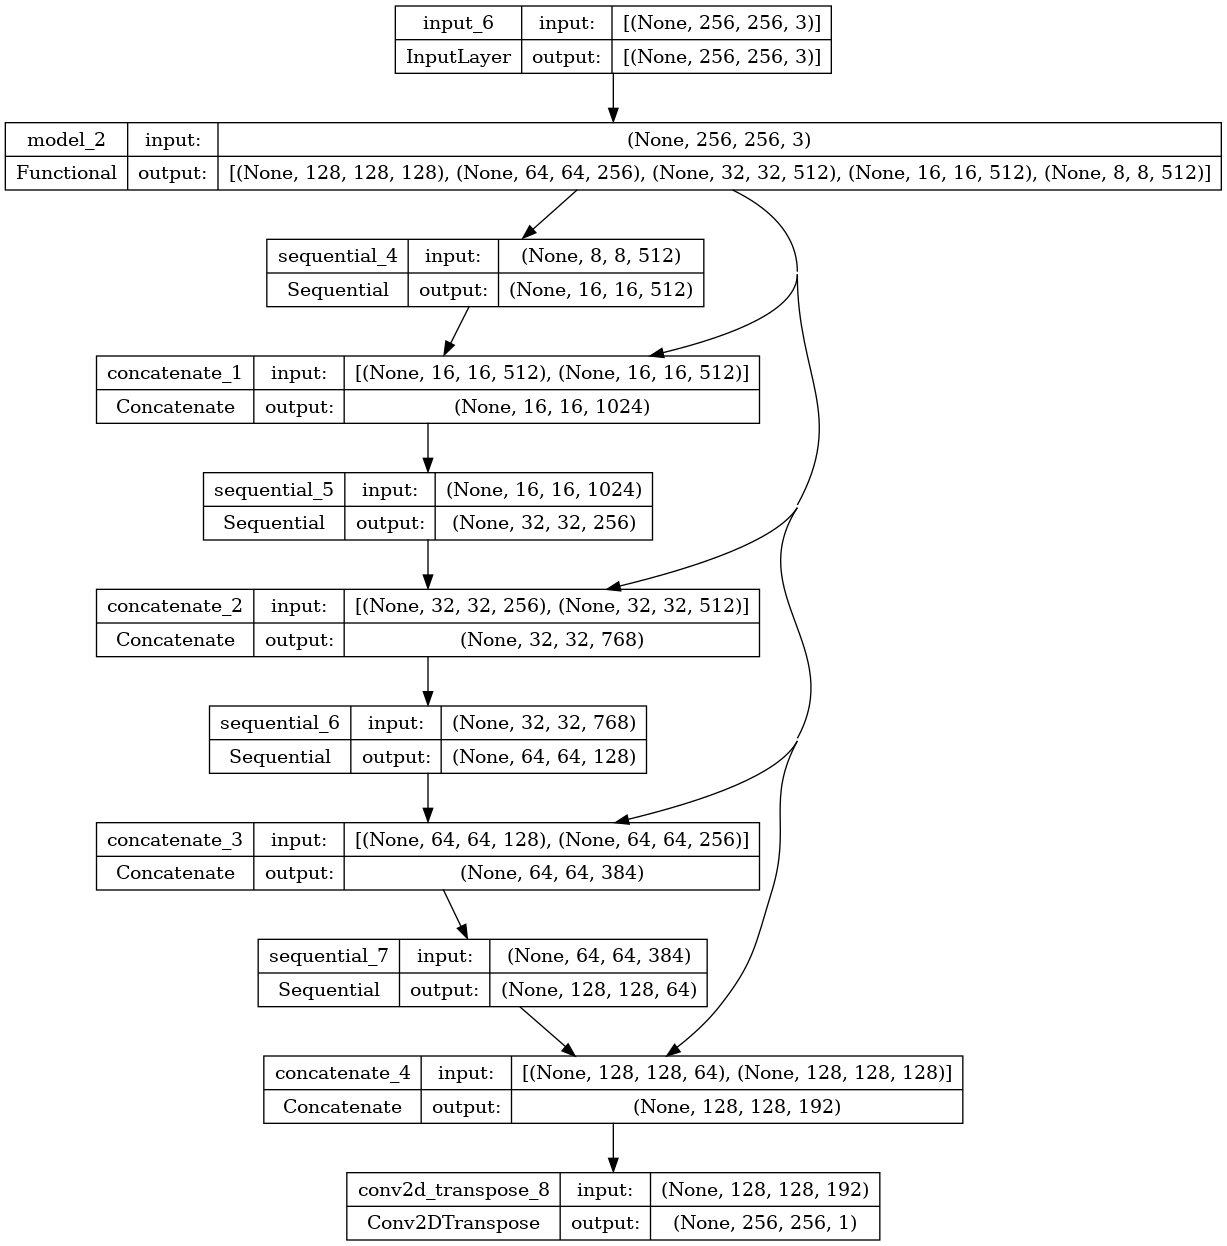

In [28]:
def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)

def dice_loss(in_gt, in_pred):
    return 1-dice_coef(in_gt, in_pred)

model = unet_model(1)

model.compile(optimizer='adam',
              loss = dice_loss,
              metrics=[dice_coef,'binary_accuracy'])

tf.keras.utils.plot_model(model, show_shapes=True)

Let's try out the model to see what it predicts before training.

1/1 [==============================] - 1s 963ms/step


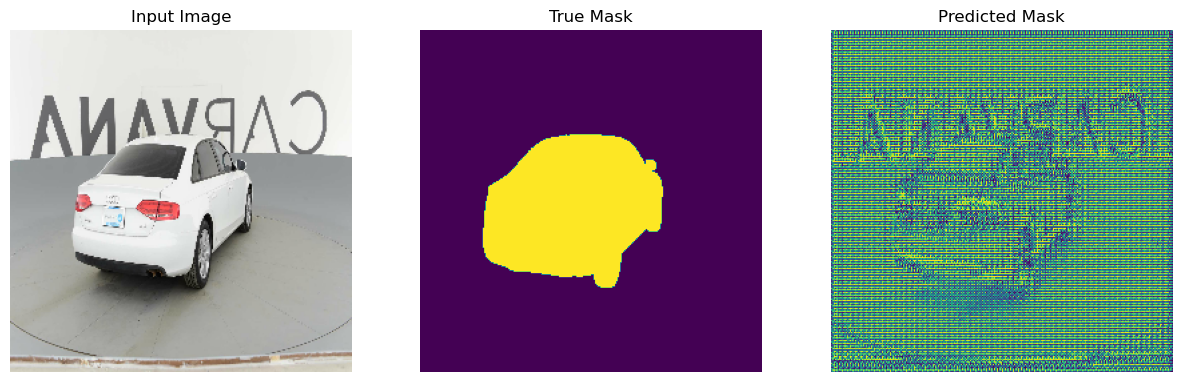

In [29]:
for images, masks in train_dataset.take(1):
    for img, mask in zip(images, masks):
        sample_image = img
        sample_mask = mask
        break
def visualize(display_list):
    plt.figure(figsize=(15, 15))
    title = ['Input Image', 'True Mask', 'Predicted Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

def show_predictions(sample_image, sample_mask):
    pred_mask = model.predict(sample_image[tf.newaxis, ...])
    pred_mask = pred_mask.reshape(img_size[0],img_size[1],1)
    visualize([sample_image, sample_mask, pred_mask])
    
show_predictions(sample_image, sample_mask)

In [30]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_2 (Functional)           [(None, 128, 128, 1  14714688    ['input_6[0][0]']                
                                28),                                                              
                                 (None, 64, 64, 256                                               
                                ),                                                                
                                 (None, 32, 32, 512                                         

Let's observe how the model improves while it is training. To accomplish this task, a callback function is defined below.

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=4,restore_best_weights=True)

class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        if (epoch + 1) % 3 == 0:
            show_predictions(sample_image, sample_mask)
EPOCHS = 15
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_data=valid_dataset,
                          callbacks=[DisplayCallback(), early_stop])

Epoch 1/15
238/238 [==============================] - ETA: 0s - loss: 0.0821 - dice_coef: 0.9179 - binary_accuracy: 0.9537

In [ ]:
import tensorflow as tf
base_model2 = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3))
tf.keras.utils.plot_model(base_model2, show_shapes=True)